In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the data and splitting into training and testing data set
Data = pd.read_csv("kc_house_data.csv")
TrainData , TestData = np.split(Data,[int(0.7*len(Data))])

# Training Begins

In [3]:
TrainData.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

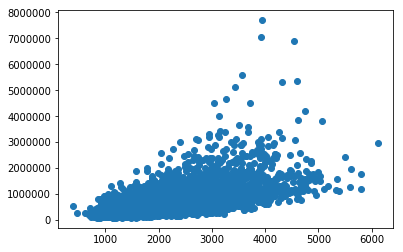

In [4]:
# Plotting independent variables with respect to dependent variable
plt.scatter(TrainData['sqft_living15'], TrainData['price'])
plt.show()

In [5]:
# Removing id, date, price from the training and testing data set and converting it into numpy array
X = np.array(TrainData.drop(['date','price','id'], axis = 1))
Y = np.array(TrainData['price'])
TestX = np.array(TestData.drop(['date', 'id', 'price'], axis = 1))
ActualValues = np.array(TestData['price'])

In [6]:
def cost(Thetas, Theta1, x, y):
    return (((np.dot(x, Thetas) + Theta1).T) - y)

In [7]:
Thetas = np.random.randn(18,1)
Theta1 = np.random.randn(1,1)
alpha = 0.00000000009
for i in range(0,5000):
    for j in range(0,18):
        Gradient = np.mean((cost(Thetas, Theta1, X, Y))*X[:,j])
    ThetasNew = Thetas - alpha*(Gradient)
    Theta1New = Theta1 - alpha*(np.mean(cost(Thetas, Theta1, X, Y)))
    
    Thetas = ThetasNew
    Theta1 = Theta1New
    
print(Thetas)
print(Theta1)

[[-0.15043907]
 [ 0.85703831]
 [ 0.78740543]
 [ 2.16205974]
 [ 1.52965997]
 [-0.27753291]
 [ 0.94944633]
 [ 3.57247528]
 [ 0.54347169]
 [ 0.48693895]
 [ 2.02492928]
 [ 0.86431456]
 [-0.62030305]
 [ 3.99109443]
 [ 1.00044868]
 [ 2.5804211 ]
 [ 1.67274548]
 [ 0.3109917 ]]
[[ 1.93626977]]


In [11]:
# Calculating costfunction and accuracy for training data
C = np.sqrt(np.mean((cost(Thetas, Theta1, X, Y)**2)/2))
MaxError = np.mean((Y**2))
AccuracyTrain = 100 - (C/MaxError)*100
AccuracyTrain

99.99993555455751

# Testing Begins

In [10]:
# Calculating cost function and accuracy for testing data
TestC = np.sqrt(np.mean((cost(Thetas,Theta1, TestX, ActualValues)**2)/2))
TestError = np.mean(ActualValues**2)
Accuracy = 100 - (TestC/TestError)*100
print("Accuracy of the model is", Accuracy,"%")

Accuracy of the model is 99.9999381793 %
